# Importing Libraries 

In [532]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import svm
import string
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

Question: 1

# Load and view Data 

In [533]:
ORV_raw=pd.read_csv("vehicle.csv")

In [534]:
ORV_raw.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [535]:
ORV_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [536]:
#Total 846 Rows and 19 Columns 
## Total 18 independent columns and one dependent column here for distinguish among vehicles
## All are numeric in nature excluding class column
ORV_raw.shape

(846, 19)

In [537]:
##Finding missing values
ORV_raw.isna().any()


compactness                    False
circularity                     True
distance_circularity            True
radius_ratio                    True
pr.axis_aspect_ratio            True
max.length_aspect_ratio        False
scatter_ratio                   True
elongatedness                   True
pr.axis_rectangularity          True
max.length_rectangularity      False
scaled_variance                 True
scaled_variance.1               True
scaled_radius_of_gyration       True
scaled_radius_of_gyration.1     True
skewness_about                  True
skewness_about.1                True
skewness_about.2                True
hollows_ratio                  False
class                          False
dtype: bool

In [538]:
## Finding count of missing values in each cloumn
ORV_raw.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [539]:

null_data = ORV_raw[ORV_raw.isnull().any(axis=1)]
null_data


compactness  circularity  distance_circularity  radius_ratio  \
5            107          NaN                 106.0         172.0   
9             93         44.0                  98.0           NaN   
19           101         56.0                 100.0         215.0   
35           100         46.0                   NaN         172.0   
66            81         43.0                  68.0         125.0   
70            96         55.0                  98.0         161.0   
77            86         40.0                  62.0         140.0   
78           104         52.0                  94.0           NaN   
105          108          NaN                 103.0         202.0   
118           85          NaN                   NaN         128.0   
141           81         42.0                  63.0         125.0   
159           91         45.0                  75.0           NaN   
177           89         44.0                  72.0         160.0   
192           93         43.0                  76.0         149.0   
207           85         42.0                   NaN         121.0   
215           90         39.0                  86.0         169.0   
222          100         50.0                  81.0         197.0   
237           85         45.0                  65.0         128.0   
249           85         34.0                  53.0         127.0   
266           86          NaN                  65.0         116.0   
273           96         45.0                  80.0         162.0   
285           89         48.0                  85.0         189.0   
287           88         43.0                  84.0           NaN   
308          109         51.0                 100.0         197.0   
319          102         51.0                   NaN         194.0   
329           89         38.0                  80.0         169.0   
345          101         54.0                 106.0           NaN   
372           97         47.0                  87.0         164.0   
396          108          NaN                 106.0         177.0   
419           93         34.0                  72.0         144.0   
467           96         54.0                 104.0           NaN   
496          106         55.0                  98.0         224.0   
522           89         36.0                  69.0         162.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
5                    50.0                        6          255.0   
9                    62.0                       11          183.0   
19                    NaN                       10          208.0   
35                   67.0                        9          157.0   
66                   57.0                        8          149.0   
70                   54.0                       10          215.0   
77                   62.0                        7          150.0   
78                   66.0                        5          208.0   
105                  64.0                       10          220.0   
118                  56.0                        8          150.0   
141                  55.0                        8          149.0   
159                  57.0                        6          150.0   
177                  66.0                        7          144.0   
192                  57.0                        7          149.0   
207                  55.0                        7          149.0   
215                  62.0                        7          162.0   
222                   NaN                        6          186.0   
237                  56.0                        8          151.0   
249                  58.0                        6            NaN   
266                  53.0                        6          152.0   
273                  63.0                        9          146.0   
285                  64.0                        8          169.0   
287                  55.0                       11          154.0   
30

In [540]:
##total number of rows with at least one missing data

ORV_raw.isnull().any(axis = 1).sum()


33

In [541]:
##Handling missing values
## At any place where in case '?' having, we are replacing NaN
ORV_raw = ORV_raw.replace('?', np.nan)

In [542]:
ORV_raw[ORV_raw.isnull().any(axis=1)].head()

compactness  circularity  distance_circularity  radius_ratio  \
5           107          NaN                 106.0         172.0   
9            93         44.0                  98.0           NaN   
19          101         56.0                 100.0         215.0   
35          100         46.0                   NaN         172.0   
66           81         43.0                  68.0         125.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
5                   50.0                        6          255.0   
9                   62.0                       11          183.0   
19                   NaN                       10          208.0   
35                  67.0                        9          157.0   
66                  57.0                        8          149.0   

    elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
5            26.0                    28.0                        169   
9            36.0                    22.0                        146   
19           32.0                    24.0                        169   
35           43.0                    20.0                        150   
66           46.0                    19.0                        146   

    scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
5             280.0              957.0                      264.0   
9             202.0              505.0                      152.0   
19            227.0              651.0                      223.0   
35            170.0              363.0                      184.0   
66            169.0              323.0                      172.0   

    scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
5                          85.0             5.0               9.0   
9                          64.0             4.0              14.0   
19                         74.0             6.0               5.0   
35                         67.0            17.0               7.0   
66                          NaN             NaN              18.0   

    skewness_about.2  hollows_ratio class  
5              181.0            183   bus  
9              195.0            204   car  
19             186.0            193   car  
35             192.0            200   van  
66             179.0            184   bus

Instead of dropping rows with missing column information, lets replace missing values with median of that specific column's 


In [543]:
## Listing all cloumns medians 
ORV_raw.median()

compactness                     93.0
circularity                     44.0
distance_circularity            80.0
radius_ratio                   167.0
pr.axis_aspect_ratio            61.0
max.length_aspect_ratio          8.0
scatter_ratio                  157.0
elongatedness                   43.0
pr.axis_rectangularity          20.0
max.length_rectangularity      146.0
scaled_variance                179.0
scaled_variance.1              363.5
scaled_radius_of_gyration      173.5
scaled_radius_of_gyration.1     71.5
skewness_about                   6.0
skewness_about.1                11.0
skewness_about.2               188.0
hollows_ratio                  197.0
dtype: float64

In [544]:
ORV_raw.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [545]:
##Replacing missing cloumn values with their column's median respectively
medainFiller = lambda x: x.fillna(x.median()) if x.name != 'class' else x
ORV_raw=ORV_raw.apply(medainFiller, axis=0)


Checking any null values present or not after applying medainFiller function which replaces null values with their cloumn's medians 

In [546]:
ORV_raw[ORV_raw.isnull().any(axis=1)].head()

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

In [547]:
ORV_raw.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [548]:
ORV_raw.isnull().values.any() 

False

Question: 2

# BiVariate Analysis 

A bi variate analysis among the different variables can be done using scatterplot matrix plot. 
Seaborne libs create a dashboard reflecting useful information about dimensions  


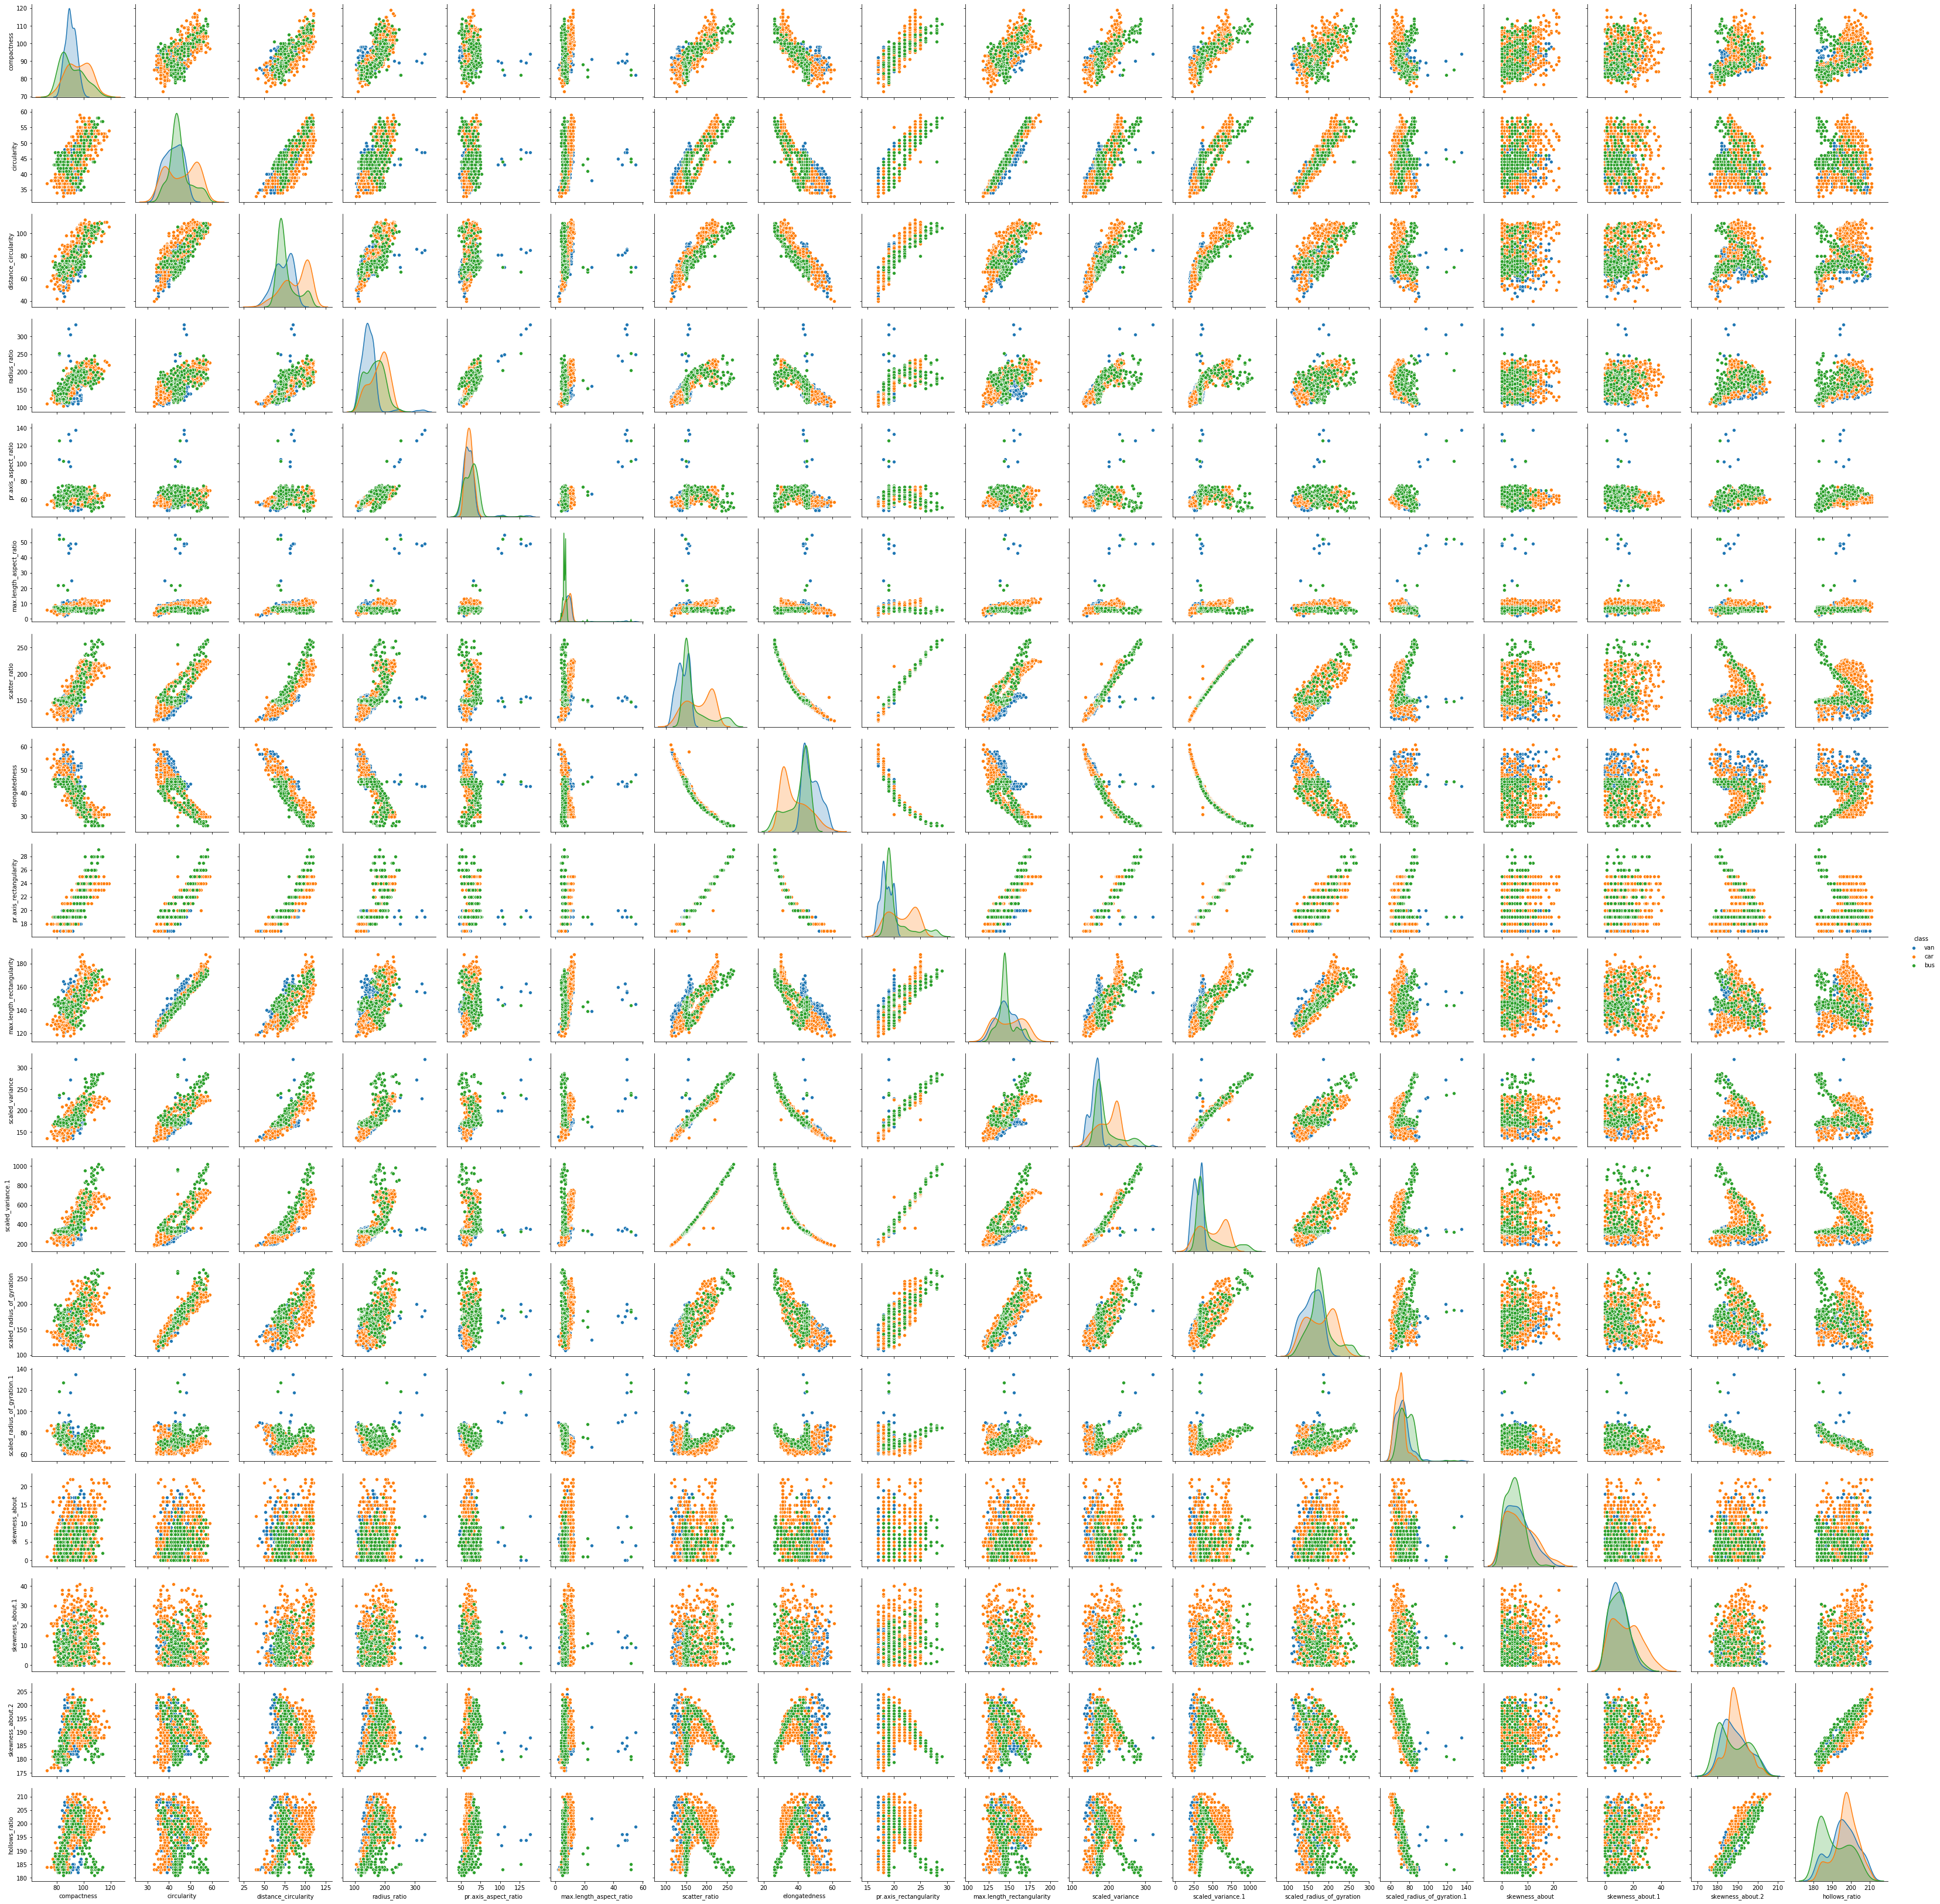

In [60]:
##ploting pair plot to find relation ship between cloumns
sns.pairplot(ORV_raw, hue='class', diag_kind='kde')

In [549]:
#correlation matrix
ORV_raw.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.689743     0.620912              0.767035   
pr.axis_aspect_ratio            0.091534     0.153778              0.158456   
max.length_aspect_ratio         0.148249     0.251467              0.264686   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.762070     0.796306              0.861519   
scaled_variance.1               0.814012     0.835946              0.886017   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.249593     0.051946             -0.225944   
skewness_about                  0.236078     0.144198              0.113924   
skewness_about.1                0.157015    -0.011439              0.265547   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689743              0.091534   
circularity                      0.620912              0.153778   
distance_circularity             0.767035              0.158456   
radius_ratio                     1.000000              0.663447   
pr.axis_aspect_ratio             0.663447              1.000000   
max.length_aspect_ratio          0.450052              0.648724   
scatter_ratio                    0.734429              0.103732   
elongatedness                   -0.789481             -0.183035   
pr.axis_rectangularity           0.708385              0.079604   
max.length_rectangularity        0.568949              0.126909   
scaled_variance                  0.793415              0.272910   
scaled_variance.1                0.718436              0.089189   
scaled_radius_of_gyration        0.536372              0.121971   
scaled_radius_of_gyration.1     -0.180397              0.152950   
skewness_about                   0.048713             -0.058371   
skewness_about.1                 0.173741             -0.031976   
skewness_about.2                 0.382214              0.239886   
hollows_ratio                    0.471309              0.267725   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812620   
circularity                                 0.251467       0.847938   
distance_circularity                        0.264686       0.905076   
radius_ratio                                0.450052       0.734429   
pr.axis_aspect_ratio                        0.648724       0.103732   
max.length_aspect_ratio                     1.000000       0.166191   
scatter_ratio                               0.166191       1.000000   
elongatedness                              -0.180140      -0.971601   
pr.axis_rectangularity                      0.161502       0.989751   
max.length_rectangularity                   0.305943       0.809083   
scaled_variance                             0.318957       0.948662   
scaled_variance.1                           0.143253       0.993012   
scaled_radius_of_gyration                   0.189743       0.799875   
scaled_radius_of_gyration.1                 0.295735      -0.027542   
skewness_about                              0.015599       0.074458   
skewness_about.1                            0.043422       0.212428   
skewness_about.2                           -0.

Up on observation using pair plot and correlation matrix, many of the variable are positively  and negatively  correlated to each other.
Ex: between pr.axis_rectangularity and scatter_ratio contains heavily positive correlation :0.989751
elongatedness and and scatter_ratio contains heavily negative correlation : -0.971601.
Similarly like above many columns have heavy correlation among them self here. 
we can drop-off few columns that contains heavy correlation between them but here I'm proceeding with  all columns without dropping any of them  to avoid information loss.

    

In [550]:
ORV_raw.groupby(["class"]).mean()

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
bus      91.591743    44.963303             76.811927    165.720183   
car      96.184149    46.030303             88.878788    180.496503   
van      90.562814    42.070352             73.281407    147.276382   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
bus               63.403670                 7.013761     170.022936   
car               60.993007                 8.825175     180.997669   
van               61.261307                 9.713568     141.537688   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
bus        40.114679               20.577982                 146.701835   
car        38.104895               21.508159                 149.967366   
van        47.939698               18.582915                 145.175879   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                  
bus         192.889908         448.894495                 180.963303   
car         197.806527         499.904429                 179.613054   
van         164.040201         298.201005                 157.276382   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                  
bus                      77.071101        4.816514         10.211009   
car                      69.935897        7.121212         15.160839   
van                      72.778894        6.417085          9.698492   

       skewness_about.2  hollows_ratio  
class                                   
bus          187.811927     191.325688  
car          189.470862     197.582751  
van          188.939698     196.145729

In [551]:
# count and their percentages of target column values in input data
bus_count = len(ORV_raw.loc[ORV_raw['class'] == "bus"])
van_count = len(ORV_raw.loc[ORV_raw['class'] == 'van'])
car_count = len(ORV_raw.loc[ORV_raw['class'] == 'car'])


print("Bus : {0} ({1:2.2f}%)".format(bus_count, (bus_count / (bus_count + van_count + car_count)) * 100 ))
print("van : {0} ({1:2.2f}%)".format(van_count, (van_count / (bus_count + van_count + car_count)) * 100 ))
print("car : {0} ({1:2.2f}%)".format(car_count, (car_count / (bus_count + van_count + car_count)) * 100 ))


Bus : 218 (25.77%)
van : 199 (23.52%)
car : 429 (50.71%)


Question:3

In [552]:

##sperating indepedent and dependent varible.

X_SVM =ORV_raw.drop('class', axis = 1)
Y_SVM =ORV_raw['class']


In [553]:
#Splitting data into train and test

x_train_svm, x_test_svm, y_train_svm, y_test_svm =train_test_split(X_SVM,Y_SVM,test_size=0.3, random_state=1)
x_train_svm.head()

compactness  circularity  distance_circularity  radius_ratio  \
350           97         46.0                 101.0         210.0   
40            95         48.0                 104.0         214.0   
89            80         37.0                  57.0         116.0   
427           86         38.0                  89.0         176.0   
353           81         47.0                  69.0         146.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
350                  66.0                        8          192.0   
40                   67.0                        9          205.0   
89                   55.0                        6          125.0   
427                  59.0                        9          169.0   
353                  64.0                        6          151.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
350           35.0                    22.0                        151   
40            32.0                    23.0                        151   
89            54.0                    18.0                        125   
427           39.0                    20.0                        132   
353           44.0                    19.0                        147   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
350            208.0              546.0                      169.0   
40             227.0              628.0                      202.0   
89             142.0              229.0                      132.0   
427            190.0              428.0                      148.0   
353            171.0              340.0                      195.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
350                         66.0             1.0              32.0   
40                          74.0             5.0               9.0   
89                          81.0             8.0               5.0   
427                         67.0             7.0              33.0   
353                         75.0             5.0               0.0   

     skewness_about.2  hollows_ratio  
350             191.0            200  
40              186.0            193  
89              178.0            184  
427             193.0            202  
353             183.0            188

Question: 4

# Build Model : SVM

In [554]:
##gamma is measure of influence of data point. It is inverse of istance of influence.
# C is penalty of wrong classifiaction
#svm_clf=svm.SVC(gamma=0.025,C=3)## Accuracy : 54.157
#svm_clf=svm.SVC(kernel='rbf') #Accuracy: 67.972%
#svm_clf=svm.SVC(kernel='poly') #Accuracy: 75.658%
#svm_clf=svm.SVC(kernel='sigmoid') #Accuracy: 28.368%

svm_clf=svm.SVC(C= .1, kernel='linear', gamma= 1) #Accuracy: 95.986%

here different kernels giving different accuracy scores.  so out of all 'liner kernel is giving highest accuracy'
so we will be continuing with linear kernel for our futher analysis

In [555]:
svm_clf.fit(x_train_svm , y_train_svm)

SVC(C=0.1, gamma=1, kernel='linear')

In [556]:
y_pred_svm =svm_clf.predict(x_test_svm)

In [557]:
model_score_train_svm = svm_clf.score(x_train_svm , y_train_svm)
print(model_score_train_svm)

0.9746621621621622


In [558]:
model_score_test_svm = svm_clf.score(x_test_svm , y_test_svm)
print(model_score_test_svm)

0.952755905511811


In [559]:
y_grid=(np.column_stack([y_test_svm,y_pred_svm]))

In [560]:
print(y_grid) ## it shows actual and pedicated values side by side

[['van' 'van']
 ['bus' 'bus']
 ['bus' 'bus']
 ['bus' 'bus']
 ['car' 'car']
 ['car' 'car']
 ['van' 'van']
 ['van' 'bus']
 ['van' 'van']
 ['van' 'van']
 ['van' 'van']
 ['van' 'van']
 ['bus' 'bus']
 ['car' 'car']
 ['bus' 'bus']
 ['car' 'bus']
 ['van' 'van']
 ['car' 'car']
 ['car' 'car']
 ['bus' 'bus']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['van' 'van']
 ['van' 'van']
 ['bus' 'bus']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['van' 'van']
 ['bus' 'bus']
 ['car' 'car']
 ['van' 'van']
 ['car' 'car']
 ['bus' 'bus']
 ['car' 'car']
 ['bus' 'bus']
 ['bus' 'bus']
 ['car' 'car']
 ['van' 'van']
 ['van' 'van']
 ['car' 'car']
 ['van' 'van']
 ['van' 'van']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['car' 'car']
 ['bus' 'bus']
 ['car' 'car']
 ['car' 'car']
 ['van' 'van']
 ['car' 'car']
 ['car' 'car']
 ['van' 'van']
 ['bus' 'bus']
 ['car' 'car']
 ['van' 'van']
 ['car' 'car']
 ['van' 'van']
 ['bus' 'bus']
 ['car' 'car']
 ['car' 'c

In [561]:
np.savetxt("vech_cls.csv", y_grid, fmt ='%s')  ## saving comparison file in local for further analysis 

In [562]:
#confusion_matrix
cm_svm=metrics.confusion_matrix(y_test_svm, y_pred_svm)
cm_svm

array([[ 56,   1,   2],
       [  2, 128,   3],
       [  2,   2,  58]], dtype=int64)

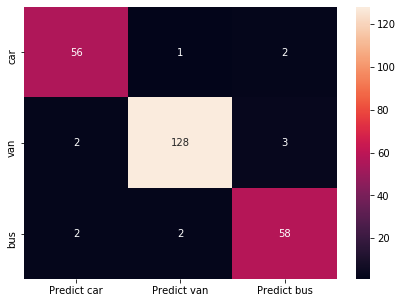

In [563]:
df_cm_svm = pd.DataFrame(cm_svm, index = [i for i in ["car","van", "bus"]],
                  columns = [i for i in ["Predict car","Predict van", "Predict bus"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_svm, annot=True,fmt='g')

Qustion:5

In [564]:
##Cross validation 

In [565]:
num_folds = 10
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)

results = cross_val_score(svm_clf, X_SVM, Y_SVM, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

C:\Users\91888\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0.92941176 0.94117647 0.98823529 0.97647059 0.95294118 0.92941176
 0.97619048 0.97619048 0.95238095 0.97619048]
Accuracy: 95.986% (2.047%)


Question: 6

In [566]:
# Scaling data using zscore
X_before_Scaling =ORV_raw.drop('class', axis = 1)
X_scaled=X_before_Scaling.apply(zscore) ## scaling
Y_raw =ORV_raw['class']
X_scaled.head()





compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
4         1.671982          -0.648070                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
4                     7.309005        0.538390         -0.179311   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

In [567]:
covMatrix = np.cov(X_scaled, rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.10385472 -0.18325156  0.07969

In [568]:
pca=PCA(n_components=18)
pca.fit(X_scaled)

PCA(n_components=18)

In [569]:
## Eigen values
print(pca.explained_variance_)

[9.40460261e+00 3.01492206e+00 1.90352502e+00 1.17993747e+00
 9.17260633e-01 5.39992629e-01 3.58870118e-01 2.21932456e-01
 1.60608597e-01 9.18572234e-02 6.64994118e-02 4.66005994e-02
 3.57947189e-02 2.74120657e-02 2.05792871e-02 1.79166314e-02
 1.00257898e-02 2.96445743e-03]


In [570]:
# Eigen vectors
print(pca.components_)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [571]:
#Percentage of variation explianed by each vector
print(pca.explained_variance_ratio_)

[5.21860337e-01 1.67297684e-01 1.05626388e-01 6.54745969e-02
 5.08986889e-02 2.99641300e-02 1.99136623e-02 1.23150069e-02
 8.91215289e-03 5.09714695e-03 3.69004485e-03 2.58586200e-03
 1.98624491e-03 1.52109243e-03 1.14194232e-03 9.94191854e-04
 5.56329946e-04 1.64497408e-04]


In [572]:
# Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(pca.explained_variance_[index], pca.components_[:,index]) for index in range(len(pca.explained_variance_))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.404602609088716, array([ 0.27528369, -0.12695376, -0.11992248,  0.07838436,  0.06951783,
        0.14487548,  0.45186233, -0.56613679, -0.4844181 , -0.26007639,
        0.04653429,  0.0120344 ,  0.15613684, -0.06004852, -0.0096778 ,
       -0.06509567,  0.00600533, -0.01007288])), (3.0149220585246304, array([ 0.29325847,  0.12557673, -0.02482055,  0.18733741, -0.08506495,
       -0.30273115, -0.24910339, -0.17985181, -0.0141569 ,  0.09807791,
        0.00301324, -0.21363509,  0.01501167,  0.42699312, -0.59786284,
       -0.2612448 , -0.07380594, -0.0091594 ])), (1.9035250218389597, array([ 3.04609128e-01, -7.29516436e-02, -5.60143254e-02, -7.12008427e-02,
        4.06645651e-02, -1.38405773e-01,  7.40350569e-02,  4.34748988e-01,
       -1.67572478e-01, -2.05031597e-01,  7.06489498e-01,  3.46330345e-04,
       -2.37111452e-01, -1.46240270e-01, -1.57257142e-01,  7.82651714e-02,
        2.50791236e-02,  6.94599696e-03])), (1.1799374684450212, array([ 0.26760688, -0.18963438,  0.275074

In [573]:
tot = sum(pca.explained_variance_)
var_explained = [(i / tot) for i in sorted(pca.explained_variance_, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 18 entries as there are 18 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 18 entries with 18 th entry 
# cumulative reaching almost 100%
cum_var_exp

array([0.52186034, 0.68915802, 0.79478441, 0.86025901, 0.9111577 ,
       0.94112183, 0.96103549, 0.97335049, 0.98226265, 0.98735979,
       0.99104984, 0.9936357 , 0.99562195, 0.99714304, 0.99828498,
       0.99927917, 0.9998355 , 1.        ])

In [574]:
#plt.bar(range(1,18), var_explained, alpha=0.5, align='center', label='individual explained variance')
#plt.step(range(1,18),cum_var_exp, where= 'mid', label='cumulative explained variance')
#plt.ylabel('Explained variance ratio')
#plt.xlabel('Principal components')
#plt.legend(loc = 'best')
#plt.show()

# Dimensionality Reduction

Now 7 dimensions seems very reasonable. With 7 variables we can explain about 95 and close to 96% of the variation in the original data!

In [575]:
pca7 = PCA(n_components=7)
pca7.fit(X_scaled)
print(pca7.components_)
print(pca7.explained_variance_ratio_)


[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [576]:
Xpca7 = pca7.transform(X_scaled)

In [577]:
Xpca7

array([[ 3.34162030e-01, -2.19026358e-01,  1.00158417e+00, ...,
         7.93007079e-02, -7.57446693e-01, -9.01124283e-01],
       [-1.59171085e+00, -4.20602982e-01, -3.69033854e-01, ...,
         6.93948582e-01, -5.17161832e-01,  3.78636988e-01],
       [ 3.76932418e+00,  1.95282752e-01,  8.78587404e-02, ...,
         7.31732265e-01,  7.05041037e-01, -3.45837595e-02],
       ...,
       [ 4.80917387e+00, -1.24931049e-03,  5.32333105e-01, ...,
        -1.34423635e+00, -2.17069763e-01,  5.73248962e-01],
       [-3.29409242e+00, -1.00827615e+00, -3.57003198e-01, ...,
         4.27680052e-02, -4.02491279e-01, -2.02405787e-01],
       [-4.76505347e+00,  3.34899728e-01, -5.68136078e-01, ...,
        -5.40510367e-02, -3.35637136e-01,  5.80978683e-02]])

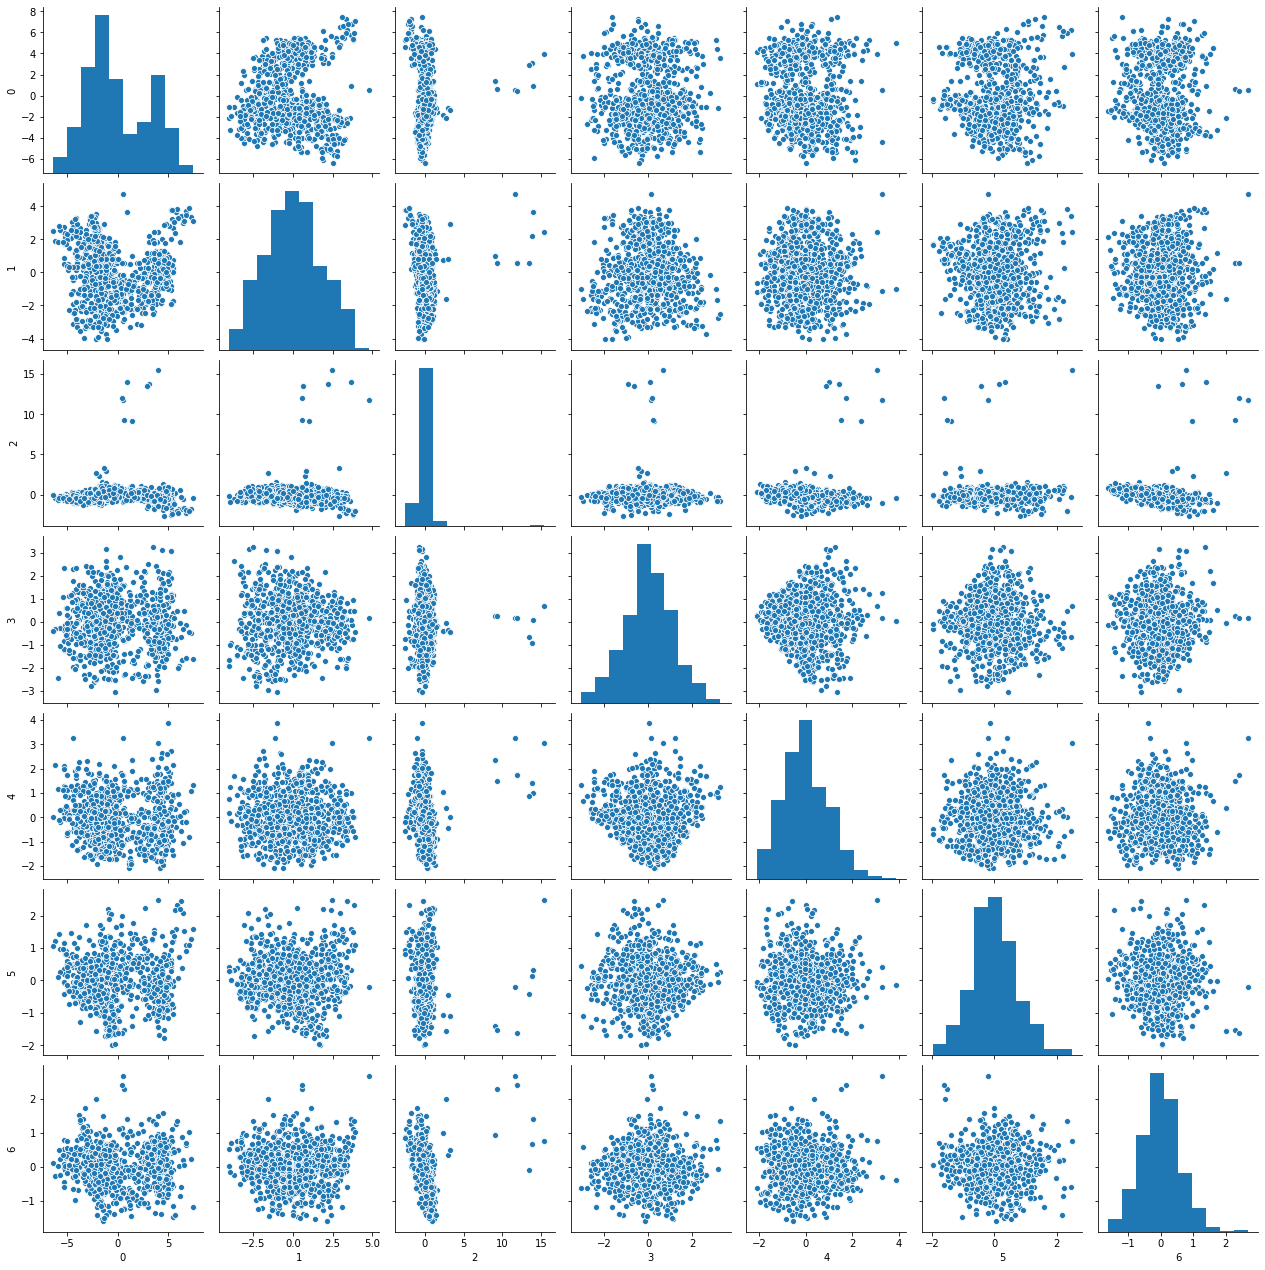

In [530]:
sns.pairplot(pd.DataFrame(Xpca7))

In [531]:
##By looking at above plots, most of columns have less correlation and more showing more independence 

Question:7

In [578]:
#using principle componets instead of raw data and spliting into train and test
##here train on PCA and test o raw data
X_train_pca, X_test_pca, y_train_raw, y_test_raw = train_test_split(Xpca7, Y_raw, test_size=0.30, random_state=1) 

In [579]:
X_train_pca

array([[ 2.07218332, -1.43333317,  0.03880982, ...,  0.20053744,
        -0.20240545, -0.63298312],
       [ 2.9652154 ,  0.64784787,  0.50328924, ..., -0.590151  ,
         0.84148381, -0.22775825],
       [-4.99135014,  2.30056389, -0.26445371, ...,  0.39009944,
         0.4952699 ,  0.29923419],
       ...,
       [ 0.10464978, -1.52242296, -0.07261952, ...,  0.10095631,
         0.44433767,  0.06535048],
       [-0.55877325,  1.71309946, -0.11595552, ..., -0.46868126,
        -1.98499327,  0.05921924],
       [ 3.07317748,  2.21420037, 13.77529839, ...,  1.42824364,
         0.13554589,  0.66207536]])

In [580]:
#Building a SVM on PCA dimensions

# C is penalty of wrong classifiaction
#svm_clf_pca=svm.SVC(gamma=0.025,C=3)## 60

#svm_clf_pca=svm.SVC(C= .1, kernel='linear', gamma= 1) ##0.952755905511811
svm_clf_pca=svm.SVC(kernel='rbf') #66
#svm_clf_pca=svm.SVC(kernel='poly') #71
#svm_clf_pca=svm.SVC(kernel='sigmoid') #31

svm_clf_pca

SVC()

In [581]:
svm_clf_pca.fit(X_train_pca, y_train_raw)
y_pred =svm_clf_pca.predict(X_test_pca)

In [582]:
model_score_train = svm_clf_pca.score(X_train_pca , y_train_raw)
print(model_score_train)

0.9408783783783784


In [583]:
model_score_test = svm_clf_pca.score(X_test_pca , y_test_raw)
print(model_score_test)

0.905511811023622


In [584]:


#cross valiation

kfold_RDIM = KFold(n_splits=10, random_state=1)

results_RDIM = cross_val_score(svm_clf_pca, Xpca7, Y_raw, cv=kfold)
print(results_RDIM)


[0.94117647 0.94117647 0.94117647 0.91764706 0.89411765 0.96470588
 0.89285714 0.8452381  0.94047619 0.89285714]


C:\Users\91888\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [585]:
print("Accuracy: %.3f%% (%.3f%%)" % (results_RDIM.mean()*100.0, results_RDIM.std()*100.0))

Accuracy: 91.714% (3.379%)


Question: 8

In [586]:
## Accuracy score for svm on raw data
print(model_score_test_svm)

0.952755905511811


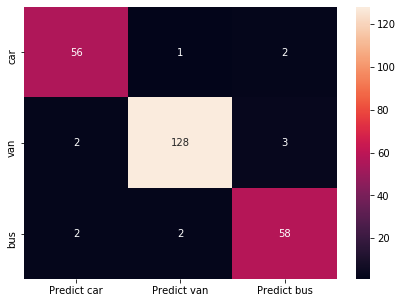

In [587]:
## Confusion matrix with raw data
from sklearn import metrics
cm_svm=metrics.confusion_matrix(y_test_svm, y_pred_svm)
cm_svm
df_cm_svm = pd.DataFrame(cm_svm, index = [i for i in ["car","van", "bus"]],
                  columns = [i for i in ["Predict car","Predict van", "Predict bus"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_svm, annot=True,fmt='g')

In [588]:

##Cross validation accuracy 
num_folds = 10
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)

results = cross_val_score(svm_clf, X_SVM, Y_SVM, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

C:\Users\91888\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0.92941176 0.94117647 0.98823529 0.97647059 0.95294118 0.92941176
 0.97619048 0.97619048 0.95238095 0.97619048]
Accuracy: 95.986% (2.047%)


In [589]:
##Using reduced dimensions from 18 to 7: accuracy scores
print(model_score_test)

0.905511811023622


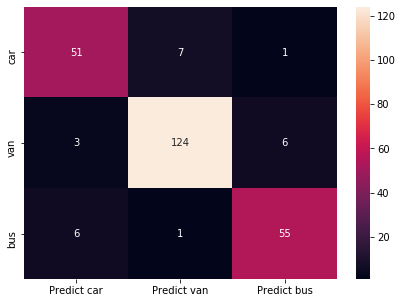

In [590]:
## Confusion matrix with raw data
from sklearn import metrics
cm_svm_pca=metrics.confusion_matrix(y_test_raw, y_pred)
cm_svm_pca
df_cm_svm_pca = pd.DataFrame(cm_svm_pca, index = [i for i in ["car","van", "bus"]],
                  columns = [i for i in ["Predict car","Predict van", "Predict bus"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_svm_pca, annot=True,fmt='g')


In [591]:
#cross valiation

kfold_RDIM = KFold(n_splits=10, random_state=1)

results_RDIM = cross_val_score(svm_clf_pca, Xpca7, Y_raw, cv=kfold)
print(results_RDIM)


[0.94117647 0.94117647 0.94117647 0.91764706 0.89411765 0.96470588
 0.89285714 0.8452381  0.94047619 0.89285714]


C:\Users\91888\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [592]:
print("Accuracy: %.3f%% (%.3f%%)" % (results_RDIM.mean()*100.0, results_RDIM.std()*100.0))

Accuracy: 91.714% (3.379%)


Looks like by  reducing dimensionality by 7, we only dropped around accuracy from 95 to 86 %, but here we reduced to 7 dimensions from 18 dimensions and this could overcome the problem of over fitting on out of sample (on test data).